### About

- Notebook about the Climate Geospatial Analysis with Python and Xarray project on Coursera.
    - Course instructor: Danilo Lessa Bernardineli (https://danlessa.github.io/)
    
    - Include the original seven course tasks and my notes 
    
    - Data and original notebooks can be downloaded from [here](https://github.com/danlessa/Coursera-Xarray)
- Created : 2022-07-04

### Notes
- Shortcuts:
    - Alt + Enter run the current cell, insert below
    
- [xarray document](https://docs.xarray.dev/en/latest/index.html)
    - [xarray.open_dataset](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html) (task 1)
        - mask_and_scale parameter defaults to True, it handles the value conversion (when applicable) with    scale_factor + add_offset
    - [Indexing and selecting data](https://docs.xarray.dev/en/latest/user-guide/indexing.html) (task 2)

### Other useful resources for working with climate data in python 
- [University of Innsbruck - Physics of Climate System](https://fabienmaussion.info/climate_system/welcome.html#)
- [Climate data analysis with xarray and cartopy](https://ep2021.europython.eu/talks/BhhAcSi-climate-data-analysis-with-xarray-and-cartopy/)
---

---
### Task 1: Load and getting familiar with NetCDF datasets

---

In [1]:
## Import xarray and open the dataset

import xarray as xr 

ds = xr.open_dataset('data.nc')

ds

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 89, longitude: 142, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 ...
    skt        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

---

### Task 2: Select and filter data through coordinates
 - Use the Xarray selectors and the where method to navigate around our data.
 - Xarray selectors allows you to filter across multidimensions without hassles, and it is an very powerful feature when dealing with geospatial data.
 
---

In [2]:
## selecting along a specific longitude

ds.sel(longitude=-82)

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 89, time: 500)
Coordinates:
    longitude  float32 -82.0
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude) float32 ...
    skt        (time, expver, latitude) float32 ...
    tp         (time, expver, latitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [3]:
## selecting based on multiple dimensions

ds.sel(longitude=-82, latitude = 5.75, time = '2010-01-01')

<xarray.Dataset>
Dimensions:    (expver: 2)
Coordinates:
    longitude  float32 -82.0
    latitude   float32 5.75
  * expver     (expver) int32 1 5
    time       datetime64[ns] 2010-01-01
Data variables:
    lai_hv     (expver) float32 ...
    skt        (expver) float32 ...
    tp         (expver) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [4]:
## selecting using the 'nearest' method

ds.sel(latitude = 99, method = 'nearest')

<xarray.Dataset>
Dimensions:    (expver: 2, longitude: 142, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
    latitude   float32 6.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, longitude) float32 ...
    skt        (time, expver, longitude) float32 ...
    tp         (time, expver, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
## selecting data with ranges
ds.sel(latitude=[-16, -15], longitude =[-46, -47], method='nearest')

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 2, longitude: 2, time: 500)
Coordinates:
  * longitude  (longitude) float32 -46.75 -47.0
  * latitude   (latitude) float32 -16.0 -15.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 ...
    skt        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [6]:
## ds.isel - isel(): index by integer array indices
ds.isel(latitude=0,longitude=0)

<xarray.Dataset>
Dimensions:    (expver: 2, time: 500)
Coordinates:
    longitude  float32 -82.0
    latitude   float32 6.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver) float32 ...
    skt        (time, expver) float32 ...
    tp         (time, expver) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [7]:
# Filter the dataset according to conditions

QUERY = ds.longitude < -64
QUERY = QUERY & (ds.latitude > -8)
ds.where(QUERY, drop=True)

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 56, longitude: 72, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -64.75 -64.5 -64.25
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -7.0 -7.25 -7.5 -7.75
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, expver, latitude, longitude) float32 0.0 0.0 ... 6.6303587
    skt        (time, expver, latitude, longitude) float32 300.6701 ... 300.53802
    tp         (time, expver, latitude, longitude) float32 0.0004337728 ... 0.0004950687
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

---
### Task 3: Visualize multidimensional and geospatial variables

- Use Xarray integrations with Matplotlib so that we can see visualizations for our geospatial data. 

- Note that we need to reload the dataset and select the dimension "expver = 1" only. 

---

(array([1.180000e+02, 3.424000e+03, 3.899800e+04, 1.086510e+05,
        1.537960e+05, 3.378610e+05, 1.026602e+06, 4.416252e+06,
        2.071530e+05, 8.690000e+02]),
 array([266.844  , 271.1717 , 275.49936, 279.82706, 284.15472, 288.48242,
        292.81012, 297.1378 , 301.46548, 305.79315, 310.12085],
       dtype=float32),
 <a list of 10 Patch objects>)

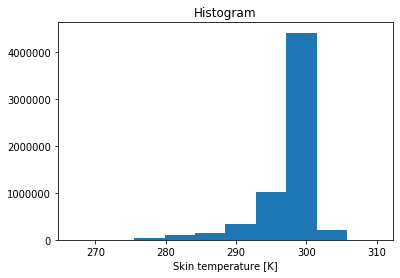

In [14]:
# Reload the data 
ds = xr.open_dataset('data.nc').sel(expver=1)
ds.skt.plot()

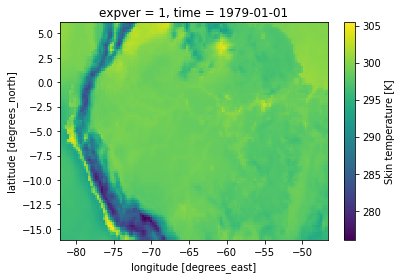

In [15]:
ds.isel(time=0).skt.plot()

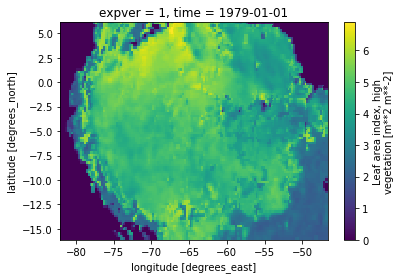

In [16]:
ds.isel(time=0).lai_hv.plot()

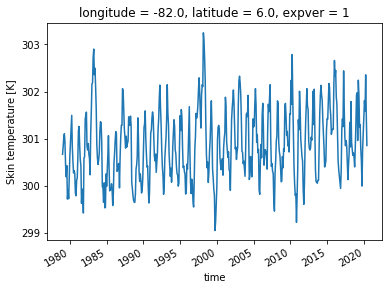

In [17]:
# plot time series 
ds.isel(longitude = 0, latitude = 0).skt.plot()

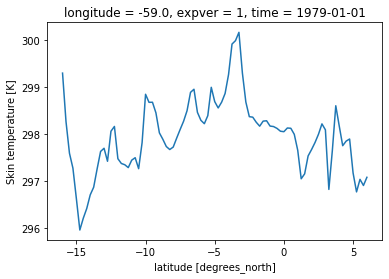

In [18]:
# Plot the latitudinal distribution of values along a certain longitude
ds.isel(time=0).sel(longitude=-59, method='nearest').skt.plot()

---

### Task 4: Apply simple operations over multidimensional data
- Apply simple multidimensional operations, like subtracting and getting the mean. 
- As we'll see, Xarray will allow to have an consistent experience even though we are handling several dimensions.

---

In [20]:
temp_change = (ds.skt.sel(time='2019-01-01') - ds.skt.sel(time='1979-01-01'))

temp_change

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[ 1.2527466 ,  1.277832  ,  1.2758484 , ...,  0.03961182,
         0.1076355 ,  0.19018555],
       [ 1.1880188 ,  1.197937  ,  1.1669006 , ..., -0.01123047,
         0.01257324,  0.08056641],
       [ 1.0024719 ,  0.996521  ,  0.9423828 , ..., -0.04425049,
        -0.05215454, -0.00726318],
       ...,
       [-0.3295288 , -0.3163147 , -0.27075195, ...,  3.6135864 ,
         3.400299  ,  3.5396423 ],
       [-0.3942566 , -0.38238525, -0.36849976, ...,  3.4597168 ,
         3.4241028 ,  3.6142578 ],
       [-0.45632935, -0.5249939 , -0.51708984, ...,  3.402954  ,
         3.262268  ,  3.3210754 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

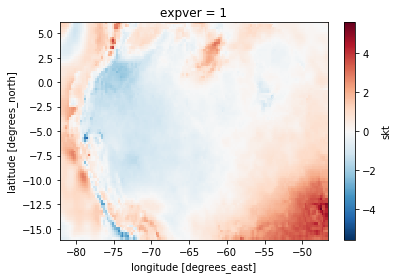

In [21]:
temp_change.plot()

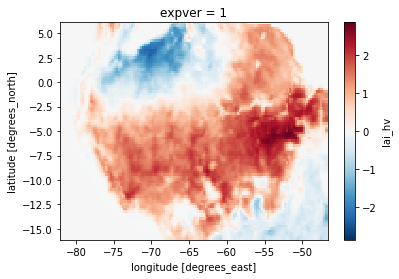

In [22]:
LAI_seasonal_change = (ds.lai_hv.sel(time='2019-07-01')
                      - ds.lai_hv.sel(time='2019-01-01'))

LAI_seasonal_change.plot()

In [23]:
ds.skt.mean()

<xarray.DataArray 'skt' ()>
array(297.2683, dtype=float32)
Coordinates:
    expver   int32 1

In [24]:
# average along the time dimension
mean_temp = ds.skt.mean(dim='time')
mean_temp

<xarray.DataArray 'skt' (latitude: 89, longitude: 142)>
array([[300.8873 , 300.82703, 300.74887, ..., 300.67136, 300.66446,
        300.68234],
       [300.84076, 300.78116, 300.67752, ..., 300.68323, 300.6837 ,
        300.6877 ],
       [300.74652, 300.67358, 300.57083, ..., 300.68448, 300.693  ,
        300.69904],
       ...,
       [293.93396, 293.92303, 293.89307, ..., 296.69812, 296.79724,
        296.8227 ],
       [293.86404, 293.85193, 293.81693, ..., 296.30548, 296.46127,
        296.48813],
       [293.79874, 293.77878, 293.74445, ..., 296.21536, 296.3526 ,
        296.1909 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1

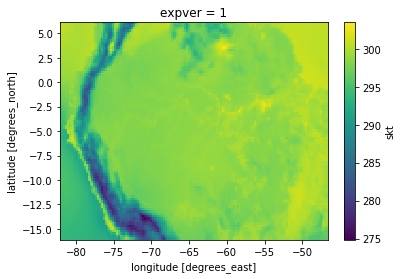

In [25]:
mean_temp.plot()

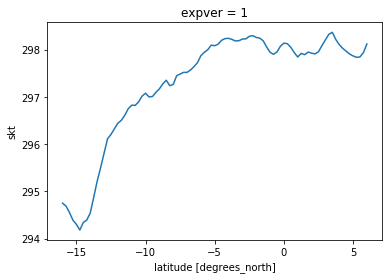

In [26]:
# average across multiple dimensions
ds.skt.mean(dim=['time', 'longitude']).plot()

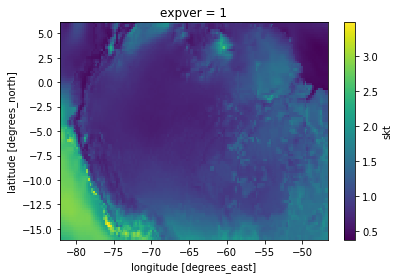

In [27]:
# plot the standard deviation 
ds.skt.std(dim='time').plot()

/Users/wenwen/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


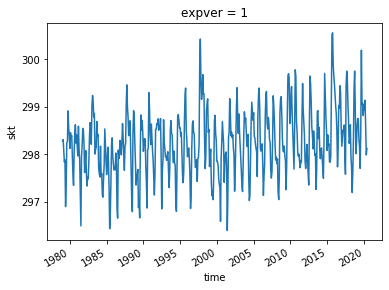

In [28]:
# plot the median value across the map
ds.skt.median(dim=['latitude', 'longitude']).plot()

---

### Task 5: Apply grouped operations over multidimensional data

- Apply operations that involves grouping and resampling. This will greatly increase the scope of what you can do with categorical and temporal datasets, and it is a powerful tool to have.

---

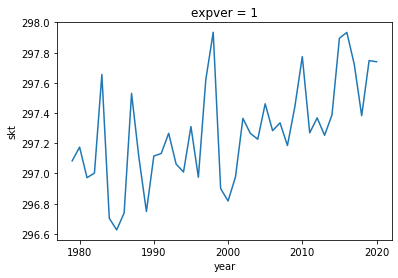

In [29]:
# Similar to pandas, the components of datetime objects contained in a given DataArray 
# can be quickly computed using a special .dt accessor.

(ds.groupby(ds.time.dt.year)
   .mean(dim=['time', 'latitude', 'longitude'])
   .skt
   .plot())

In [31]:
# To understand the above operation

(ds.groupby(ds.time.dt.year)
   .mean(dim=['time', 'latitude', 'longitude'])
   .skt)

<xarray.DataArray 'skt' (year: 42)>
array([297.08368, 297.17456, 296.9722 , 297.0028 , 297.65518, 296.70334,
       296.6264 , 296.73883, 297.5306 , 297.1022 , 296.74857, 297.11533,
       297.13272, 297.26608, 297.06268, 297.0096 , 297.3107 , 296.9751 ,
       297.6209 , 297.93518, 296.90033, 296.81763, 296.97772, 297.36505,
       297.26578, 297.2267 , 297.46146, 297.2834 , 297.33542, 297.18515,
       297.44296, 297.77426, 297.26892, 297.36813, 297.25284, 297.38797,
       297.89557, 297.93402, 297.72333, 297.3828 , 297.74722, 297.73993],
      dtype=float32)
Coordinates:
    expver   int32 1
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019 2020

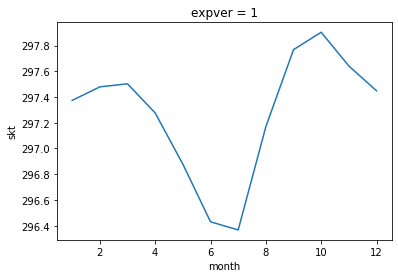

In [32]:
# We could change the datetime object from year to month and plot the monthly climatology

(ds.groupby(ds.time.dt.month)
   .mean(dim=['time', 'latitude', 'longitude'])
   .skt
   .plot())

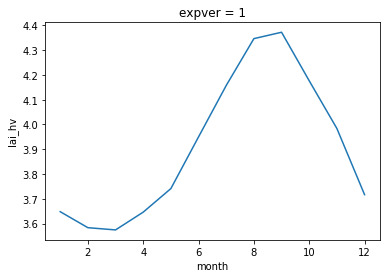

In [33]:
(ds.groupby(ds.time.dt.month)
   .mean(dim=['time', 'latitude', 'longitude'])
   .lai_hv
   .plot())

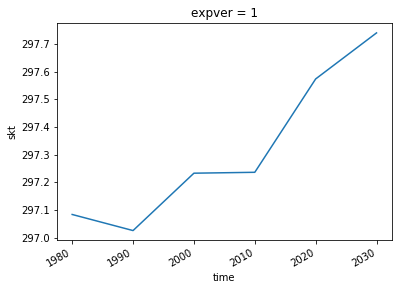

In [36]:
(ds.resample({'time': '10y'})
  .mean(dim=['time', 'latitude', 'longitude'])
  .skt
  .plot())

---

### Task 6: Merge and concatenate datasets
- Merge and concatenate datasets and variables on Xarray. This is important if you are generating data or handling several sources, as it allows you to mix everything together into a single object.

---

In [37]:
da = ds.time.dt.year

da

<xarray.DataArray 'year' (time: 500)>
array([1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979, 1979,
       1979, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
       1980, 1980, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,
       1981, 1981, 1981, 1982, 1982, 1982, 1982, 1982, 1982, 1982, 1982,
       1982, 1982, 1982, 1982, 1983, 1983, 1983, 1983, 1983, 1983, 1983,
       1983, 1983, 1983, 1983, 1983, 1984, 1984, 1984, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1985, 1985, 1985, 1985, 1985,
       1985, 1985, 1985, 1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986,
       1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1987, 1987, 1987,
       1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1988, 1988,
       1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1989,
       1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989,
       1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
       1990, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
       1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
       1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,
       1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994,
       1994, 1994, 1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995,
       1995, 1995, 1995, 1995, 1995, 1995, 1996, 1996, 1996, 1996, 1996,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1997, 1997, 1997, 1997,
       1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1998, 1998, 1998,
       1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1999, 1999,
       1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 2000,
       2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001,
       2001, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
       2002, 2002, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003,
       2003, 2003, 2003, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
       2005, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017,
       2017, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018,
       2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020])
Coordinates:
    expver   int32 1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01

In [38]:
# merge da to ds

ds_1 = ds.merge(da)
ds_1 # see the new variable "year" added in the merged data array


<xarray.Dataset>
Dimensions:    (latitude: 89, longitude: 142, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 300.6701 300.60406 ... nan
    tp         (time, latitude, longitude) float32 ...
    year       (time) int64 1979 1979 1979 1979 1979 ... 2020 2020 2020 2020
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [39]:
da      = ds.longitude ** 2 + ds.latitude ** 2
da.name = 'squared_distance'
ds_2    = ds.merge(da)
ds_2

<xarray.Dataset>
Dimensions:           (latitude: 89, longitude: 142, time: 500)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv            (time, latitude, longitude) float32 ...
    skt               (time, latitude, longitude) float32 300.6701 ... nan
    tp                (time, latitude, longitude) float32 ...
    squared_distance  (longitude, latitude) float32 6760.0 ... 2441.5625
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [40]:
ds_3 = ds_1.merge(ds_2)
ds_3

<xarray.Dataset>
Dimensions:           (latitude: 89, longitude: 142, time: 500)
Coordinates:
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
    expver            int32 1
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv            (time, latitude, longitude) float32 0.0 0.0 ... nan nan
    skt               (time, latitude, longitude) float32 300.6701 ... nan
    tp                (time, latitude, longitude) float32 0.0004337728 ... nan
    year              (time) int64 1979 1979 1979 1979 ... 2020 2020 2020 2020
    squared_distance  (longitude, latitude) float32 6760.0 ... 2441.5625
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [41]:
ds_square_root = ds_3 ** (1/2)
ds_cube_root   = ds_3 ** (1/3)
ds_4           = xr.concat([ds_3, ds_square_root, ds_cube_root], 'dim_power')
ds_4

<xarray.Dataset>
Dimensions:           (dim_power: 3, latitude: 89, longitude: 142, time: 500)
Coordinates:
    expver            int32 1
  * latitude          (latitude) float32 6.0 5.75 5.5 ... -15.5 -15.75 -16.0
  * time              (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
  * longitude         (longitude) float32 -82.0 -81.75 -81.5 ... -47.0 -46.75
Dimensions without coordinates: dim_power
Data variables:
    lai_hv            (dim_power, time, latitude, longitude) float32 0.0 ... nan
    skt               (dim_power, time, latitude, longitude) float32 300.6701 ... nan
    tp                (dim_power, time, latitude, longitude) float32 0.0004337728 ... nan
    year              (dim_power, time) float64 1.979e+03 1.979e+03 ... 12.64
    squared_distance  (dim_power, longitude, latitude) float32 6760.0 ... 13.465505
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

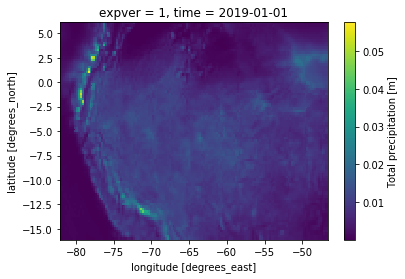

In [42]:
ds.sel(time='2019-01-01').tp.plot()

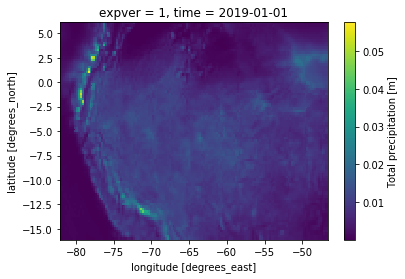

In [43]:
# We could reproduce the above figure using ds_4

ds_4.sel(dim_power=0, time='2019-01-01').tp.plot()

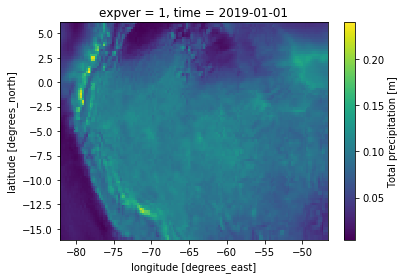

In [44]:
# Taking a look at the square_root result

ds_4.sel(dim_power=1, time='2019-01-01').tp.plot()

---

### Task 7: Interact with Pandas and export datasets
- To interface Xarray with Pandas through exporting and importing objects, as well as to export Xarray datasets to NetCDF files. This knowledge is important when working into a Data Science workflow.

---

In [45]:
# Convert xarray dataset to data frame

df = ds.to_dataframe()
df

expver    lai_hv         skt        tp
latitude longitude time                                              
 6.0     -82.00    1979-01-01       1  0.000000  300.670105  0.000434
                   1979-02-01       1  0.000000  300.829926  0.001139
                   1979-03-01       1  0.000000  301.014832  0.005566
                   1979-04-01       1  0.000000  301.105957  0.011398
                   1979-05-01       1  0.000000  300.924347  0.009486
...                               ...       ...         ...       ...
-16.0    -46.75    2020-04-01       1  1.905231  295.797791  0.004340
                   2020-05-01       1  1.735271  293.425049  0.001070
                   2020-06-01       1  1.578286  293.098816  0.000035
                   2020-07-01       1       NaN         NaN       NaN
                   2020-08-01       1       NaN         NaN       NaN

[6319000 rows x 4 columns]

In [46]:
da = ds.time.dt.month
da.to_dataframe()

,expver,month
time,,
1979-01-01,1,1
1979-02-01,1,2
1979-03-01,1,3
1979-04-01,1,4
1979-05-01,1,5
...,...,...
2020-04-01,1,4
2020-05-01,1,5
2020-06-01,1,6


In [47]:
da.to_series()

time
1979-01-01    1
1979-02-01    2
1979-03-01    3
1979-04-01    4
1979-05-01    5
             ..
2020-04-01    4
2020-05-01    5
2020-06-01    6
2020-07-01    7
2020-08-01    8
Name: month, Length: 500, dtype: int64

In [48]:
# Convert data frame to xarray dataset
xr.Dataset.from_dataframe(df)

<xarray.Dataset>
Dimensions:    (latitude: 89, longitude: 142, time: 500)
Coordinates:
  * latitude   (latitude) float64 -16.0 -15.75 -15.5 -15.25 ... 5.5 5.75 6.0
  * longitude  (longitude) float64 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    expver     (latitude, longitude, time) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    lai_hv     (latitude, longitude, time) float32 0.0 0.0 0.0 ... 0.0 nan nan
    skt        (latitude, longitude, time) float32 295.77206 296.6583 ... nan
    tp         (latitude, longitude, time) float32 0.00029232353 ... nan

In [49]:
df.skt

latitude  longitude  time      
 6.0      -82.00     1979-01-01    300.670105
                     1979-02-01    300.829926
                     1979-03-01    301.014832
                     1979-04-01    301.105957
                     1979-05-01    300.924347
                                      ...    
-16.0     -46.75     2020-04-01    295.797791
                     2020-05-01    293.425049
                     2020-06-01    293.098816
                     2020-07-01           NaN
                     2020-08-01           NaN
Name: skt, Length: 6319000, dtype: float32

In [50]:
# Convert df.skt to data array 

xr.DataArray.from_series(df.skt)

<xarray.DataArray 'skt' (latitude: 89, longitude: 142, time: 500)>
array([[[295.77206, 296.6583 , 297.15753, ..., 293.6714 ,       nan,
               nan],
        [295.84402, 296.72433, 297.21432, ..., 293.70636,       nan,
               nan],
        [295.88895, 296.77914, 297.25922, ..., 293.67532,       nan,
               nan],
        ...,
        [295.07468, 295.82224, 296.3763 , ..., 293.03412,       nan,
               nan],
        [295.3362 , 296.01376, 296.56384, ..., 293.1675 ,       nan,
               nan],
        [295.1995 , 295.83215, 296.38223, ..., 293.09882,       nan,
               nan]],

       [[295.81894, 296.68536, 297.25528, ..., 293.8061 ,       nan,
               nan],
        [295.88895, 296.74216, 297.31998, ..., 293.72223,       nan,
               nan],
        [295.93384, 296.79498, 297.3629 , ..., 293.6595 ,       nan,
               nan],
        ...,
        [295.01196, 295.71857, 296.36838, ..., 293.25336,       nan,
               nan],
        [295.31308, 295.9061 , 296.6028 , ..., 293.30817,       nan,
               nan],
        [295.47687, 295.99988, 296.6596 , ..., 293.22165,       nan,
               nan]],

       [[295.848  , 296.73026, 297.36688, ..., 293.81006,       nan,
               nan],
        [295.91864, 296.78705, 297.43094, ..., 293.7143 ,       nan,
               nan],
        [295.95166, 296.83197, 297.46262, ..., 293.55582,       nan,
               nan],
        ...,
        [295.27017, 295.94705, 296.72037, ..., 293.61853,       nan,
               nan],
        [295.55347, 296.13065, 296.93893, ..., 293.72025,       nan,
               nan],
        [295.77997, 296.26733, 297.01688, ..., 293.55383,       nan,
               nan]],

       ...,

       [[300.6351 , 300.7619 , 300.71237, ..., 300.8121 ,       nan,
               nan],
        [300.56906, 300.57236, 300.47595, ..., 300.7784 ,       nan,
               nan],
        [300.48453, 300.36304, 300.19067, ..., 300.72955,       nan,
               nan],
        ...,
        [299.93378, 300.36502, 300.30624, ..., 301.6006 ,       nan,
               nan],
        [299.9318 , 300.3399 , 300.2805 , ..., 301.57748,       nan,
               nan],
        [299.8968 , 300.27322, 300.2303 , ..., 301.59332,       nan,
               nan]],

       [[300.647  , 300.77512, 300.85104, ..., 300.8352 ,       nan,
               nan],
        [300.58426, 300.63312, 300.65756, ..., 300.80417,       nan,
               nan],
        [300.49246, 300.45087, 300.3921 , ..., 300.7632 ,       nan,
               nan],
        ...,
        [299.84396, 300.295  , 300.24747, ..., 301.5854 ,       nan,
               nan],
        [299.805  , 300.2402 , 300.1986 , ..., 301.54446,       nan,
               nan],
        [299.75018, 300.15436, 300.1418 , ..., 301.52466,       nan,
               nan]],

       [[300.6701 , 300.82993, 301.01483, ..., 300.857  ,       nan,
               nan],
        [300.60406, 300.71503, 300.84116, ..., 300.79227,       nan,
               nan],
        [300.53143, 300.58954, 300.6186 , ..., 300.7784 ,       nan,
               nan],
        ...,
        [299.7251 , 300.1484 , 300.12463, ..., 301.53653,       nan,
               nan],
        [299.6452 , 300.06454, 300.06387, ..., 301.49557,       nan,
               nan],
        [299.58643, 299.99585, 300.03284, ..., 301.48172,       nan,
               nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -16.0 -15.75 -15.5 -15.25 ... 5.5 5.75 6.0
  * longitude  (longitude) float64 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01

In [51]:
# save to netcdf file
ds.to_netcdf('export.nc')

xr.open_dataset('export.nc')

<xarray.Dataset>
Dimensions:    (latitude: 89, longitude: 142, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...